In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from dateutil.parser import parse
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 15)
import datetime
from dateutil.parser import parse
import math

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read df pickle
df_alg = pd.read_pickle("objects/df_alg")
df_cons = pd.read_pickle("objects/df_cons4")

# Modelling and Preliminary Results

---

Due to the needs for specific algorithms the modelling has now been carried out in Weka and below are two selected models and evaluation scores.

### Decision Tree Classifier: J48 (C4.5) 

![J48](Weka_results/Seminar2/tree.J48-C0.25-M4-10F.png)

![DecisionTree](Weka_results/Seminar2/tree1.png)

![tree](Weka_results/Seminar2/tree2.png)

### Ensemble Classifier: Random Forest

![randomForest](Weka_results/Seminar2/RandomForest1.png)

![randomForest](Weka_results/Seminar2/RandomForest2.png)

# Scikit-learn Analysis

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 30)

df_cons.isnull().sum()

date                       0
sampling station           0
sampling depth             0
sampling method            0
PSP                        5
DSP                        1
DSP_like                  60
ASP                      344
Dinophysis caudata         1
Dinophysis fortii          1
Phalacroma rotundatum      1
Dinophysis sacculus        1
Dinophysis tripos          1
sun [h]                    0
air temp                   0
wind strength              0
precipitation              0
Chl-a                    610
salinity                 176
T                        230
SECCHI                   661
NH4-N                    513
NO2-N                    503
NO3-N                    499
PO4-P                    505
SiO3-Si                  570
O2                       269
pH                       401
Soca                      81
lipophylic_toxins        249
dtype: int64

In [4]:
# Change date to month only
df_cons["date"] = df_alg["date"].dt.month_name()

# Create df for the sckiti-learn; Remove sampling station, sampling depth, sampling method
df_cons_SL = df_cons.drop(columns=["sampling station", "sampling depth", "sampling method", "SECCHI", "pH", "Chl-a", ])
df_cons_SL

,date,PSP,DSP,DSP_like,ASP,Dinophysis caudata,Dinophysis fortii,Phalacroma rotundatum,Dinophysis sacculus,Dinophysis tripos,sun [h],air temp,wind strength,precipitation,salinity,T,NH4-N,NO2-N,NO3-N,PO4-P,SiO3-Si,O2,Soca,lipophylic_toxins
0,May,1206.0,68.0,NaN,NaN,27.0,0.0,21.0,0.0,0.0,197.1,15.114286,2.933333,26.2,33.78,13.58,1.25,0.06,6.73,0.15,4.91,230.449997,1471.231,NaN
3,May,4188.0,17.0,NaN,NaN,8.0,0.0,0.0,0.0,0.0,197.1,15.114286,2.933333,26.2,36.18,12.62,0.60,0.04,1.12,0.12,3.02,250.100006,1471.231,NaN
6,June,0.0,27.0,NaN,NaN,16.0,3.0,5.0,0.0,0.0,166.3,18.790476,3.157143,18.8,35.53,17.03,1.25,0.14,1.23,0.22,1.82,274.209991,3304.045,NaN
7,June,324.0,23.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,179.1,18.533333,3.052381,23.9,35.01,19.89,1.28,0.12,2.52,0.09,0.83,275.109985,2263.119,NaN
8,June,0.0,20.0,NaN,NaN,8.0,0.0,0.0,0.0,0.0,157.5,19.095238,3.066667,29.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873.218,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,December,0.0,20.0,0.0,2500.0,0.0,10.0,0.0,10.0,0.0,64.3,8.547619,2.466667,81.1,34.72,16.58,1.51,0.15,4.69,0.10,9.21,212.506997,4071.444,neg
1517,December,0.0,0.0,0.0,2100.0,0.0,0.0,0.0,0.0,0.0,64.3,8.547619,2.466667,81.1,36.54,16.48,1.28,0.14,2.34,0.01,5.26,217.990202,4071.444,neg
1522,January,20.0,40.0,0.0,200.0,10.0,20.0,10.0,0.0,0.0,124.8,4.609524,2.647619,0.0,36.80,13.48,0.34,1.53,2.73,0.07,6.58,237.135858,1709.376,NaN
1521,January,0.0,0.0,0.0,2100.0,0.0,0.0,0.0,0.0,0.0,124.8,4.609524,2.647619,0.0,37.91,14.11,0.03,1.22,1.26,0.04,3.68,228.221284,1709.376,NaN


In [5]:
# Preprocessing for NN in scikit_learn
# one-hot encoding of date feature
df_cons_SL = pd.get_dummies(df_cons_SL, columns=["date"])

# Remove missing values
df_cons_SL = df_cons_SL.dropna(how="any").copy()

# Class distribution
df_cons_SL["lipophylic_toxins"].value_counts()

neg    417
poz     51
Name: lipophylic_toxins, dtype: int64

In [6]:
# [Continuation...] Preprocessing for NN in scikit_learn
X = df_cons_SL.copy().drop("lipophylic_toxins", axis=1)
y = df_cons_SL["lipophylic_toxins"]

# sklearn lable encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
print(f"Class labels pre-transform: {list(le.classes_)}")
y = le.transform(y)
print(f"Class labels post-transform: {np.unique(y)}")

# scalling numeric values
from sklearn.preprocessing import StandardScaler
scaled_array = StandardScaler().fit_transform(X)
X = pd.DataFrame(scaled_array, columns=X.columns)

Class labels pre-transform: ['neg', 'poz']
Class labels post-transform: [0 1]


In [7]:
# Fix class imbalance with Synthetic Minority Oversampling Technique - SMOTE – and undersampling!
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# summarize class distribution
counter = Counter(y)
print('Original dataset shape: %s' % Counter(y))

# define SMOTE pipeline (oversampling instances with poz (minority class) and undersampling those with neg label)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_res, y_res = pipeline.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y_res)
print('Resampled dataset shape: %s' % Counter(y_res))

Original dataset shape: Counter({0: 417, 1: 51})
Resampled dataset shape: Counter({0: 260, 1: 208})


## Model Training and Evaluation

### Random Forest Model

#### Model evaluation (Random Forest)

In [8]:
# Model evaluation with the pipeline of SMOTE oversampling and undersampling on the training dataset only (within each cross-validation fold)!
# Evaluate k (SMOTE) parameter. 

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Cross-validation of model with ROC AUC with SMOTE pipeline  


# Find best performing k-value for SMOTE
k_values = list(range(1,11))
RF_auc_best_k = (_, 0)
for k in k_values:   
    # define pipeline
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    clf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features=None)
    over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.8)
    steps = [('over', over), ('under', under), ('clf', clf)]
    pipeline = Pipeline(steps=steps)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
    if score > RF_auc_best_k[1]:
        RF_auc_best_k = (k, score)

print(f">>Best k-value: k={RF_auc_best_k[0]} with Mean ROC AUC on resampled dataset: {round(RF_auc_best_k[1], 2)}")  

# Cross-validation of model with ROC AUC without SMOTE pipeline  
scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
RF_auc_score = mean(scores)
print(f">>Mean ROC AUC on unsampled dataset: {round(RF_auc_score, 2)}\n")

# Cross-validation of model with Recall with SMOTE pipeline
# Find best performing k-value for SMOTE
RF_recall_best_k = (_, 0)
for k in k_values:
    scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean Recall: %.3f' % (k, score))
    if score > RF_recall_best_k[1]:
        RF_recall_best_k = (k, score)

print(f">>Best k-value: k={RF_recall_best_k[0]} with Mean Recall on resampled dataset: {round(RF_recall_best_k[1], 2)}")   

# Cross-validation of model with Recall without SMOTE pipeline  
scores = cross_val_score(clf, X, y, scoring='recall', cv=cv, n_jobs=-1)
RF_recall_score = mean(scores)
print(f">>Mean Recall on unsampled dataset: {round(RF_recall_score, 2)}")

> k=1, Mean ROC AUC: 0.849
> k=2, Mean ROC AUC: 0.858
> k=3, Mean ROC AUC: 0.864
> k=4, Mean ROC AUC: 0.852
> k=5, Mean ROC AUC: 0.851
> k=6, Mean ROC AUC: 0.846
> k=7, Mean ROC AUC: 0.861
> k=8, Mean ROC AUC: 0.858
> k=9, Mean ROC AUC: 0.861
> k=10, Mean ROC AUC: 0.861
>>Best k-value: k=3 with Mean ROC AUC on resampled dataset: 0.86
>>Mean ROC AUC on unsampled dataset: 0.85

> k=1, Mean Recall: 0.536
> k=2, Mean Recall: 0.549
> k=3, Mean Recall: 0.575
> k=4, Mean Recall: 0.556
> k=5, Mean Recall: 0.523
> k=6, Mean Recall: 0.601
> k=7, Mean Recall: 0.556
> k=8, Mean Recall: 0.582
> k=9, Mean Recall: 0.588
> k=10, Mean Recall: 0.608
>>Best k-value: k=10 with Mean Recall on resampled dataset: 0.61
>>Mean Recall on unsampled dataset: 0.38


#### Feature importance (Random Forest)

Text(0.5, 1.0, 'Permutation Importance Random Forest')

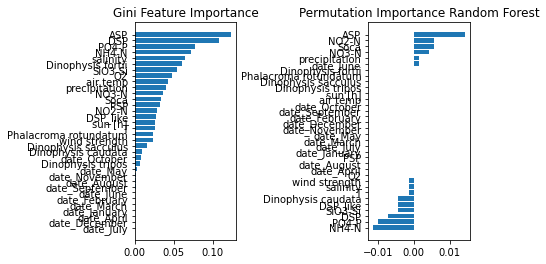

In [9]:
# Feature importance of model (RandomForest) with three methods!
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=1.3)

# Split data and fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features=None)
rf.fit(X_train, y_train)

# Get feature importance with Gini importance (mean decreased impurity)
# print(rf.feature_importances_)
gini_sorted_idx = rf.feature_importances_.argsort()
x1 = X.columns[gini_sorted_idx]
y1 = rf.feature_importances_[gini_sorted_idx]
ax1.barh(x1, y1)
ax1.set_title("Gini Feature Importance")

# Get feature importance with Permutation Based Feature Importance (randomly shuffles each feature and compute the 
# change in the model’s performance. The features which impact the performance the most are the most important one).
perm_importance = permutation_importance(rf, X_test, y_test)
perm_sorted_idx = perm_importance.importances_mean.argsort()
x2 = X.columns[perm_sorted_idx]
y2 = perm_importance.importances_mean[perm_sorted_idx]
ax2.barh(x2, y2)
ax2.set_title("Permutation Importance Random Forest")

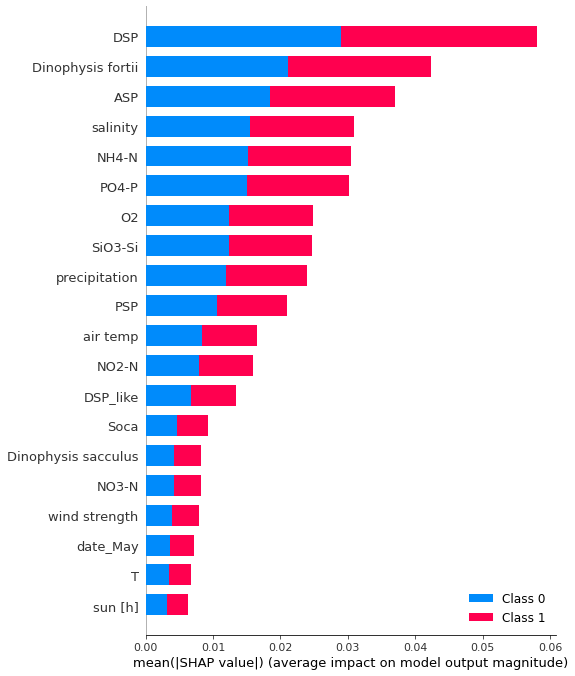

In [10]:
# Get feature importance with SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
RF_shap = shap.summary_plot(shap_values, X_test, plot_type="bar")

### Neural Network Model

#### Model Evaluation (MLP)

In [11]:
# Model evaluation with the pipeline of SMOTE oversampling and undersampling on the training dataset only (within each cross-validation fold)!
# Evaluate k (SMOTE) parameter. 
from sklearn.neural_network import MLPClassifier

# Cross-validation of model with ROC AUC with SMOTE pipeline  
# define pipeline
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(20,10), max_iter=3000, random_state=1)
over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('over', over), ('under', under), ('clf', clf)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

# Find best performing k-value for SMOTE
k_values = list(range(1,11))
MLP_auc_best_k = (_, 0)
for k in k_values:
    # evaluate pipeline
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
    if score > MLP_auc_best_k[1]:
        MLP_auc_best_k = (k, score)

print(f">>Best k: k={MLP_auc_best_k[0]} with Mean ROC AUC on resampled dataset: {round(MLP_auc_best_k[1], 2)}")  

# Cross-validation of model with ROC AUC without SMOTE pipeline  
scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
MLP_auc_score = mean(scores)
print(f">>Mean ROC AUC on unsampled dataset: {round(MLP_auc_score, 2)}\n")

# Cross-validation of model with Recall with SMOTE pipeline
# Find best performing k-value for SMOTE
MLP_recall_best_k = (_, 0)
for k in k_values:
    # evaluate pipeline
    scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean Recall: %.3f' % (k, score))
    if score > MLP_recall_best_k[1]:
        MLP_recall_best_k = (k, score)

print(f">>Best k: k={MLP_recall_best_k[0]} with Mean Recall on unsampled dataset: {round(MLP_recall_best_k[1], 2)}")  

# Cross-validation of model with Recall without SMOTE pipeline  
scores = cross_val_score(clf, X, y, scoring='recall', cv=cv, n_jobs=-1)
MLP_recall_score = mean(scores)
print(f">>Mean Recall on unsampled dataset: {round(MLP_recall_score, 2)}")

> k=1, Mean ROC AUC: 0.768
> k=2, Mean ROC AUC: 0.787
> k=3, Mean ROC AUC: 0.788
> k=4, Mean ROC AUC: 0.781
> k=5, Mean ROC AUC: 0.801
> k=6, Mean ROC AUC: 0.797
> k=7, Mean ROC AUC: 0.780
> k=8, Mean ROC AUC: 0.789
> k=9, Mean ROC AUC: 0.813
> k=10, Mean ROC AUC: 0.790
>>Best k: k=9 with Mean ROC AUC on resampled dataset: 0.81
>>Mean ROC AUC on unsampled dataset: 0.78

> k=1, Mean Recall: 0.549
> k=2, Mean Recall: 0.542
> k=3, Mean Recall: 0.523
> k=4, Mean Recall: 0.529
> k=5, Mean Recall: 0.536
> k=6, Mean Recall: 0.569
> k=7, Mean Recall: 0.523
> k=8, Mean Recall: 0.542
> k=9, Mean Recall: 0.497
> k=10, Mean Recall: 0.536
>>Best k: k=6 with Mean Recall on unsampled dataset: 0.57
>>Mean Recall on unsampled dataset: 0.43


In [12]:
# GRid search
from sklearn.model_selection import GridSearchCV

NN = MLPClassifier(solver='lbfgs', max_iter=3000)
parameters = {"hidden_layer_sizes": [(3,), (3, 3), (3, 3, 3)]}
gs = GridSearchCV(NN, parameters, scoring="roc_auc", cv=3) # "recall"
gs.fit(X_res, y_res)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=3000, solver='lbfgs'),
             param_grid={'hidden_layer_sizes': [(3,), (3, 3), (3, 3, 3)]},
             scoring='roc_auc')

In [13]:
gs.cv_results_

{'mean_fit_time': array([0.04933604, 0.08362961, 0.09254948]),
 'std_fit_time': array([0.01455216, 0.03925254, 0.02802438]),
 'mean_score_time': array([0.00211422, 0.00190028, 0.00177614]),
 'std_score_time': array([1.73857375e-04, 2.28377981e-04, 3.47935048e-05]),
 'param_hidden_layer_sizes': masked_array(data=[(3,), (3, 3), (3, 3, 3)],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (3,)},
  {'hidden_layer_sizes': (3, 3)},
  {'hidden_layer_sizes': (3, 3, 3)}],
 'split0_test_score': array([0.93528236, 0.92770282, 0.90746294]),
 'split1_test_score': array([0.88014326, 0.88938864, 0.91221056]),
 'split2_test_score': array([0.9416113 , 0.96511628, 0.93139535]),
 'mean_test_score': array([0.91901231, 0.92740258, 0.91702295]),
 'std_test_score': array([0.02760575, 0.03091641, 0.01034599]),
 'rank_test_score': array([2, 1, 3], dtype=int32)}

#### Feature Importance (MLP)

Text(0.5, 1.0, 'Permutation Importance MLP')

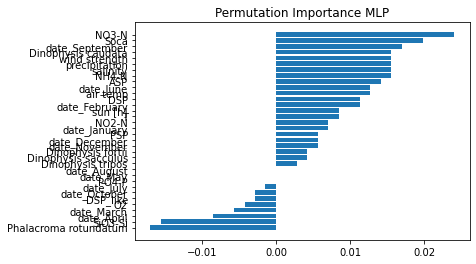

In [15]:
# Feature importance of model (RandomForest) with three methods (no cross-validation!)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt
fig, (ax2) = plt.subplots(1, 1)
plt.subplots_adjust(wspace=1.3)

# Split data and fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
MLP = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(20,10), max_iter=3000, random_state=1)
MLP.fit(X_train, y_train)

# Get feature importance with Permutation Based Feature Importance (randomly shuffles each feature and compute the 
# change in the model’s performance. The features which impact the performance the most are the most important one).
perm_importance = permutation_importance(MLP, X_test, y_test)
perm_sorted_idx = perm_importance.importances_mean.argsort()
x2 = X.columns[perm_sorted_idx]
y2 = perm_importance.importances_mean[perm_sorted_idx]
ax2.barh(x2, y2)
ax2.set_title("Permutation Importance MLP")

In [ ]:
# explain the model's predictions using SHAP
import shap
# explainer = shap.KernelExplainer(clf.predict_proba, X_train)
explainer = shap.KernelExplainer(MLP.predict_proba, shap.sample(pd.DataFrame(X_train, columns=X.columns), 100))
shap_values = explainer.shap_values(X_test)

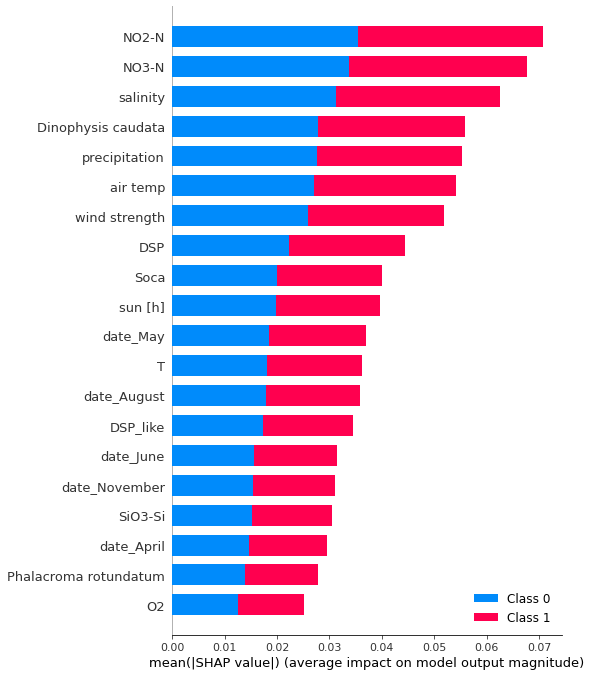

In [21]:
# visualize the first prediction's explanation (Shapley value is the average contribution of features which are predicting in different situation).
shap.summary_plot(shap_values, X_test)

### Conclusion

In [22]:
# Summary table of prediction results
RF_recall = round(RF_recall_best_k[1], 2)
RF_auc = round(RF_auc_best_k[1], 2)
MLP_recall = round(MLP_recall_best_k[1], 2)
MLP_auc = round(MLP_auc_best_k[1], 2)

summary = pd.DataFrame(
    [
        (
            "RF",
            RF_recall_score,
            RF_auc_score,
        ),
        (
            "MLP",
            MLP_recall_score,
            MLP_auc_score,
        ),
        (
            "RF (smote)",
            RF_recall,
            RF_auc,
        ),
        (
            "MLP (smote)",
            MLP_recall,
            MLP_auc,
        ),
        (
            "Decision tree (J48)*",
            0.56,
            0.18,
        ),
    ],
    columns=("Model", "Recall", "ROC AUC"),
).set_index("Model")

print("Table summarising the prediction results of the used classifiers, both with and without SMOTE resampling:\n")
summary.round(2)

Table summarising the prediction results of the used classifiers, both with and without SMOTE resampling:



,Recall,ROC AUC
Model,,
RF,0.38,0.85
MLP,0.43,0.78
RF (smote),0.61,0.86
MLP (smote),0.57,0.81
Decision tree (J48)*,0.56,0.18


As can be seen resampling with SMOTE helped to improve the results substantially, especially when calculating recall. The highest recall and ROC AUC was achieved with Random Forest with the re-sampled data. Both recall and ROC AUC suggest Random Forest as beeing the better classifier for this particular problem. Recall is a crucial metric as it gives indication of what fraction of true positive instances have been predicted. Since the models predict toxins in seashells (food) it is crucial that as few positives as possible are missed.

Due to the use of SMOTE resampling (upsampling and downsampling) in combinaiton with cross-validation it was curcial to do the resampling within each fold to avoid data lekeage and validate on original (unsampled) data. In addition, I have optimised the model with regard to the k-values of SMOTE, all of which brought along some complexity. So for the parameter tuning of Random Forest and MLP various parameter settings have been tried  and the model with best performing settings has been chosen.

The decision tree J48 algorithm was run within Weka on a slightly different dataset (missing values were not removed to use as many instances as possible, cross validation was 10-fold as opposed to 3-fold due to a higher dataset etc.) thus this results are not directly comparable but were provided as a reference to give an indication of the performance of this algorithm. 

As can be seen in the feature importance bar plots above, similar features were on the top despite using two different classification algorithms and two different feature ranking methods. If we consider just the three highest-ranking features of each of the feature ranking methods for both algortihms (RF and MLP) the features that overlap are DSP, DSP_like, ASP, Dinophysis fortii and Dinophysis caudata. These can be shown to the domain experts for validation and interpretation.